In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
priv_sect = pd.read_excel("C:/Users/m218101/Desktop/WBS_Coding_school/Course/Final_project/BRICS_World_Bank_Indicators/BRICS_Private_Sector_Data.xlsx")

In [5]:
top10depart_China_1995_2018 = pd.read_csv("C:/Users/m218101/Desktop/WBS_Coding_school/Course/Final_project/intern_tourism_demographics/top10depart_China_1995_2018.csv") 

In [6]:
top10depart_China_1995_2018 = top10depart_China_1995_2018.set_index('Unnamed: 0')

In [7]:
top10depart_China_1995_2018.index.names = [None]

In [8]:
priv_sect.head(2)

,Country Name,Country Code,Series Name,Series Code,1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Brazil,BRA,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,11.895098,10.494023,9.322425,8.521143,5.991149,3.891622,2.273232,2.353515,2.918907,3.442275,3.956084,3.584773,3.199274,4.031608,3.083604,2.610276,2.812195,3.524811,NaN,3.514469,3.442710,3.392559,3.292478,3.058174,3.390181,5.190341,3.716306,3.578963,3.763963,4.550533,4.820086,4.163496,3.981770,4.547900,4.046789,3.897916,3.763571,3.842906,3.608609,3.823365,3.882940,3.565907,3.842070,3.679592,4.099105,4.809225,4.959097,4.735486,5.425976,5.761630,5.662896
1,Brazil,BRA,Agricultural raw materials imports (% of merch...,TM.VAL.AGRI.ZS.UN,1.851044,2.178320,1.971959,2.073260,2.014877,1.497433,1.418146,1.458700,1.447775,1.351869,1.335360,1.116009,0.925132,1.132453,1.567984,1.711051,2.432691,2.272939,NaN,3.428061,2.570037,2.623140,2.716827,4.318985,3.250908,2.715485,3.002882,2.567663,2.103457,2.022756,1.968709,1.351874,1.495779,1.749924,1.754823,1.538394,1.523373,1.391965,1.213946,1.156938,1.297379,1.451951,1.098318,1.020780,1.000481,1.052735,1.248035,1.206450,1.079218,1.034323,1.055024


In [9]:
pr_s = priv_sect.copy()

In [10]:
pr_s = pr_s.rename(columns={"Country Name": "Country_Name","Country Code": "Country_Code", "Series Name": "Series_Name", "Series Code": "Series_Code"})

In [11]:
pr_s.Series_Name.unique()

array(['Agricultural raw materials exports (% of merchandise exports)',
       'Agricultural raw materials imports (% of merchandise imports)',
       'Number of visits or required meetings with tax officials (average for affected firms)',
       'Average time to clear exports through customs (days)',
       'Binding coverage, all products (%)',
       'Binding coverage, manufactured products (%)',
       'Binding coverage, primary products (%)',
       'Bound rate, simple mean, all products (%)',
       'Bound rate, simple mean, manufactured products (%)',
       'Bound rate, simple mean, primary products (%)',
       'Bribery incidence (% of firms experiencing at least one bribe payment request)',
       'Business extent of disclosure index (0=less disclosure to 10=more disclosure)',
       'Commercial service exports (current US$)',
       'Commercial service imports (current US$)',
       'Computer, communications and other services (% of commercial service exports)',
       'Compu

In [12]:
pr_s.columns = pr_s.columns.str.replace(' \[YR\d+\]', '', regex=True)

In [13]:
pr_s_china = pr_s.loc[pr_s["Country_Name"] == "China", :]

In [14]:
pr_s_china_1995_2018 = pr_s_china.drop(pr_s_china.loc[:,'1970':'1994'].columns, axis=1)

In [15]:
pr_s_china_1995_2018=pr_s_china_1995_2018.drop(['Country_Code','Series_Code'], axis=1) 

In [16]:
result = pd.concat([top10depart_China_1995_2018, pr_s_china_1995_2018], axis=0)

In [17]:
result.head(3)

,Country_Name,Series_Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
3,China,NaN,4.520000e+06,5.061000e+06,5.324000e+06,8.426000e+06,9.232000e+06,1.047300e+07,1.213300e+07,1.660200e+07,2.022200e+07,2.885300e+07,3.102600e+07,3.452400e+07,4.095400e+07,4.584400e+07,4.765600e+07,5.738600e+07,7.025000e+07,8.318200e+07,9.818500e+07,1.165930e+08,1.278600e+08,1.351300e+08,1.430350e+08,1.497200e+08,NaN,NaN
168,China,Agricultural raw materials exports (% of merch...,1.813539e+00,1.666305e+00,1.467150e+00,1.160324e+00,1.270086e+00,1.133612e+00,9.033329e-01,8.084054e-01,6.653709e-01,5.571659e-01,5.349227e-01,4.829004e-01,4.673186e-01,4.452980e-01,4.630328e-01,4.724637e-01,5.501949e-01,4.811490e-01,4.606672e-01,4.688305e-01,4.181180e-01,4.419758e-01,4.170991e-01,4.183526e-01,0.394508,0.329665
169,China,Agricultural raw materials imports (% of merch...,5.195815e+00,5.120595e+00,5.233002e+00,4.224964e+00,4.301212e+00,4.807932e+00,4.573939e+00,4.256453e+00,3.994187e+00,4.042121e+00,3.901436e+00,3.994172e+00,3.780122e+00,3.580240e+00,3.408756e+00,3.774568e+00,4.270062e+00,3.945864e+00,3.724888e+00,3.570637e+00,3.704338e+00,3.476679e+00,3.938645e+00,3.574027e+00,2.985119,2.725623


In [18]:
result_melt = result.melt(id_vars=['Country_Name','Series_Name'], value_vars=['1995','1996','1997','1998','1999','2000','2001'
                                                                              ,'2002','2003','2004','2005','2006','2007','2008'
                                                                              ,'2009','2010','2011','2012','2013','2014','2015'
                                                                              ,'2016','2017','2018','2019','2020'], ignore_index=False) #or transpose

In [19]:
result_melt.head(5)

,Country_Name,Series_Name,variable,value
3,China,NaN,1995,4.520000e+06
168,China,Agricultural raw materials exports (% of merch...,1995,1.813539e+00
169,China,Agricultural raw materials imports (% of merch...,1995,5.195815e+00
170,China,Number of visits or required meetings with tax...,1995,NaN
171,China,Average time to clear exports through customs ...,1995,NaN


In [20]:
result_transpose = result.T

In [21]:
result_transpose.head(5)

,3,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335
Country_Name,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China,China
Series_Name,NaN,Agricultural raw materials exports (% of merch...,Agricultural raw materials imports (% of merch...,Number of visits or required meetings with tax...,Average time to clear exports through customs ...,"Binding coverage, all products (%)","Binding coverage, manufactured products (%)","Binding coverage, primary products (%)","Bound rate, simple mean, all products (%)","Bound rate, simple mean, manufactured products...","Bound rate, simple mean, primary products (%)",Bribery incidence (% of firms experiencing at ...,Business extent of disclosure index (0=less di...,Commercial service exports (current US$),Commercial service imports (current US$),"Computer, communications and other services (%...","Computer, communications and other services (%...",Cost of business start-up procedures (% of GNI...,"Cost of business start-up procedures, female (...","Cost of business start-up procedures, male (% ...","Cost to export, border compliance (US$)","Cost to export, documentary compliance (US$)","Cost to import, border compliance (US$)","Cost to import, documentary compliance (US$)",Depth of credit information index (0=low to 8=...,Ease of doing business rank (1=most business-f...,Ease of doing business score (0 = lowest perfo...,Export unit value index (2000 = 100),Export value index (2000 = 100),Export volume index (2000 = 100),Firms competing against unregistered firms (% ...,Firms expected to give gifts in meetings with ...,Firms experiencing electrical outages (% of fi...,Firms experiencing losses due to theft and van...,Firms formally registered when operations star...,Firms offering formal training (% of firms),Firms that do not report all sales for tax pur...,Firms that spend on R&D (% of firms),Firms using banks to finance investment (% of ...,Firms using banks to finance working capital (...,Firms visited or required meetings with tax of...,Firms with female participation in ownership (...,Firms with female top manager (% of firms),Food exports (% of merchandise exports),Food imports (% of merchandise imports),Fuel exports (% of merchandise exports),Fuel imports (% of merchandise imports),Import unit value index (2000 = 100),Import value index (2000 = 100),Import volume index (2000 = 100),Informal payments to public officials (% of fi...,Insuranc

In [22]:
df=result_transpose.copy()

In [23]:
df.columns = df.columns.astype(str)

In [24]:
df = df.rename(columns={'3': 'dep3'})

In [25]:
df = df.drop(['Country_Name','Series_Name','2020'])

In [26]:
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

In [27]:
df.corrwith(df["dep3"],axis=0).sort_values()

252    -0.954013
176    -0.877502
246    -0.821064
278    -0.816940
297    -0.800704
298    -0.796236
299    -0.796236
265    -0.788805
328    -0.787365
183    -0.766705
212    -0.754812
185    -0.753443
184    -0.753443
186    -0.753443
234    -0.738149
332    -0.737149
302    -0.732192
301    -0.725172
169    -0.711114
320    -0.705250
321    -0.705250
319    -0.704602
304    -0.700470
291    -0.693947
292    -0.692853
303    -0.685156
306    -0.680828
305    -0.678757
168    -0.675677
293    -0.669201
210    -0.665745
220    -0.665663
310    -0.662207
312    -0.656779
226    -0.653115
309    -0.652162
280    -0.651827
307    -0.621624
330    -0.620933
311    -0.619042
275    -0.617172
308    -0.610167
283    -0.544183
314    -0.533816
190    -0.533412
313    -0.533412
324    -0.533412
318    -0.533412
188    -0.533412
284    -0.533412
316    -0.533388
189    -0.530983
326    -0.529394
325    -0.529127
187    -0.527403
219    -0.513540
231    -0.497482
333    -0.495285
235    -0.3759

In [28]:
df_ind = df.reset_index()

In [29]:
df_ind.head(2)

,index,dep3,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335
0,1995,4520000.0,1.813539,5.195815,2.1,7.6,100.0,100.0,100.0,10.02,9.64,11.32,11.6,10.0,1.842996e+10,2.463461e+10,24.393596,29.014261,1.9,1.9,1.9,484.1441,84.57353,745.0,125.8929,6.0,32.0,62.27669,105.0,59.702331,56.859363,57.7,10.9,33.7,3.9,95.8,79.2,49.45,38.7,14.7,22.1,59.4,64.2,17.5,8.26668,6.992863,3.583847,3.881477,103.0,58.695517,56.970374,10.7,10.049615,17.346814,9.436183,9.220000e+09,1.090000e+09,3.688000e+09,46387000.0,4520000.0,8.984367,1.262600e+10,552000000.0,8.730000e+09,9.873700e+08,3.970000e+09,3.093000e+08,150000000.0,49.8,2.6,3.8,3.37,3.4,3.31,2.99,3.68,3.32,3.2,0.5,84.039416,78.843231,35.367650,1.487800e+11,1.489570e+11,0.816195,2.189424,87.216052,5.052540,1.679614,1.379034,0.997074,1.686406,1.173086,6.915214,5.052540,1.320840e+11,1.321630e+11,2.622234,1.52626,84.394355,5.109485,3.828257,1.988603,0.589898,0.518022,0.949146,7.873926,5.109485,38.236308,101.941748,3.579166,95252.0,2.065541,4.440777,8.5,0.1,0.0,28.55,5.0,10.6,30.2,9.144700e+08,NaN,3.093000e+08,150000000.0,52.5029,54.24311,44.49856,0.0,0.0,0.0,13.0,13.0,13.0,3.0,22.02,21.7,23.71,19.76,18.43,24.98,23.7,22.98,26.14,19.76,18.43,24.98,9.0,265.9,496.25,143.2,27.5,23.45,34.3,34.35,34.35,0.9,25.93349,21.19675,92.31429,65.7,6.9,318.0,1.7,68.8,18.188265,38.669620,47.368524,14.969305,1.3
1,1996,5061000.0,1.666305,5.120595,2.1,7.6,100.0,100.0,100.0,10.02,9.64,11.32,11.6,10.0,2.056700e+10,2.236900e+10,34.881120,32.857973,1.9,1.9,1.9,484.1441,84.57353,745.0,125.8929,6.0,32.0,62.27669,107.0,60.612432,56.647133,57.7,10.9,33.7,3.9,95.8,79.2,49.45,38.7,14.7,22.1,59.4,64.2,17.5,8.22750,5.900043,3.926778,4.953813,101.0,61.745858,61.067117,10.7,0.598045,1.041620,9.436183,9.220000e+09,1.090000e+09,4.474000e+09,51128000.0,5061000.0,8.984367,1.262600e+10,552000000.0,1.020000e+10,2.859100e+09,3.970000e+09,5.084420e+09,149300000.0,49.8,2.6,3.8,3.37,3.4,3.31,2.99,3.68,3.32,3.2,0.5,84.266054,78.972406,36.638055,1.510480e+11,1.511630e+11,0.715988,2.087529,87.924497,4.727349,1.606033,1.333811,1.002594,1.480394,1.209334,6.632166,4.727349,1.388330e+11,1.389490e+11,2.502618,1.91664,82.694840,5.434988,4.592941,2.222338,0.780604,0.795881,0.975790,9.367554,5.434988,33.560880,105.940594,3.579166,95252.0,1.790736,4.508811,8.5,0.1,0.0,28.55,5.0,10.6,30.2,2.512900e+09,NaN,3.752120e+09,149300000.0,52.5029,54.24311,44.49856,0.0,0.0,0.0,13.0,13.0,13.0,3.0,22.02,21.7,23.71,19.76,18.43,24.98,23.7,22.98,26.14,19.76,18.43,24.98,9.0,265.9,496.25,143.2,27.5,23.45,34.3,34.35,34.35,0.9,25.93349,21.19675,92.31429,65.7,6.9,318.0,1.7,68.8,14.926825,46.099513,49.594010,20.000894,1.3


In [30]:
result_transpose[[225,181,260,253,223,216,196]].iloc[1]

225          International tourism, number of departures
181             Commercial service imports (current US$)
260    Merchandise exports to low- and middle-income ...
253    Merchandise exports to low- and middle-income ...
223    International tourism, expenditures for travel...
216                     Import volume index (2000 = 100)
196                     Export volume index (2000 = 100)
Name: Series_Name, dtype: object

In [31]:
melt_to_plot1 = result_melt[result_melt.index.isin([181])] #223

In [32]:
melt_to_plot2 = result_melt[result_melt.index.isin([260,253])] #216,196

In [33]:
melt_to_plot3 = result_melt[result_melt.index.isin([216,196])] 

In [34]:
melt_to_plot4 = result_melt[result_melt.index.isin([225])]

In [35]:
melt_ind1 = melt_to_plot1.reset_index()

In [36]:
melt_ind2 = melt_to_plot2.reset_index()

In [37]:
melt_ind3 = melt_to_plot3.reset_index()

In [38]:
melt_ind4 = melt_to_plot4.reset_index()

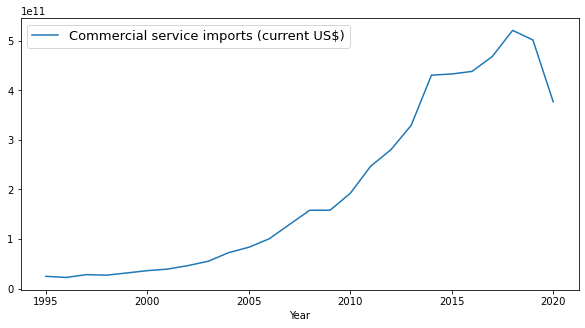

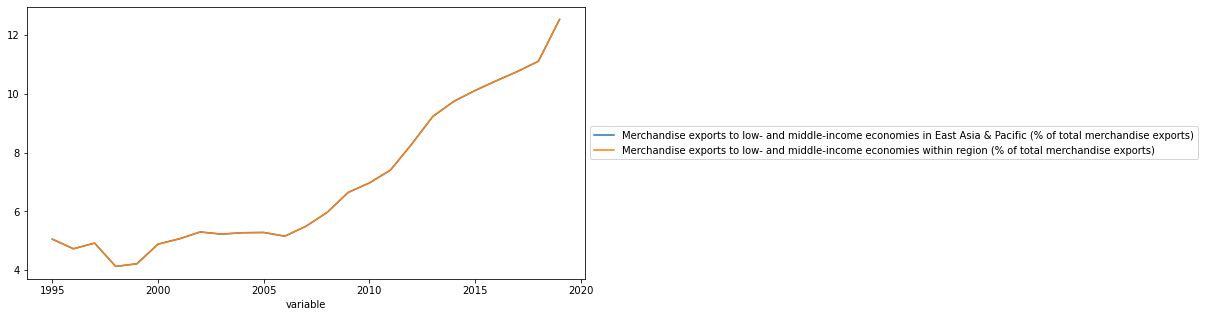

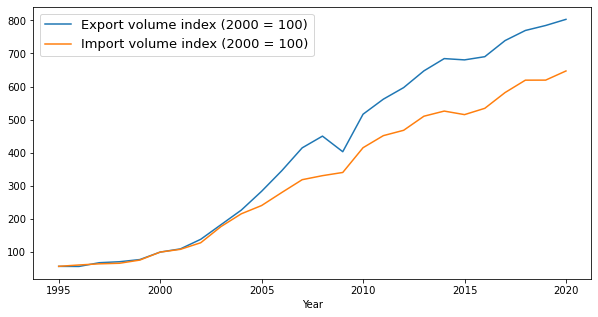

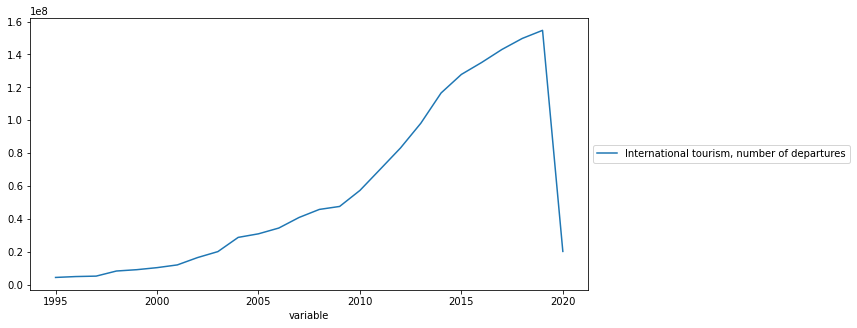

In [39]:
e_ch1 = melt_ind1.pivot(index = 'variable', columns='Series_Name', values='value')
e_ch1.plot(kind='line',figsize=(10,5))
ax = plt.subplot(111)
ax.set_xlabel('Year')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(fontsize=13)
plt.savefig('C:/Users/m218101/Desktop/WBS_Coding_school/Course/Final_project/intern_tourism_demographics/pr_s_china_1.png',dpi=200
           ,bbox_inches='tight') 
e_ch2 = melt_ind2.pivot(index = 'variable', columns='Series_Name', values='value')
e_ch2.plot(kind='line',figsize=(10,5))
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
e_ch3 = melt_ind3.pivot(index = 'variable', columns='Series_Name', values='value')
e_ch3.plot(kind='line',figsize=(10,5))
ax = plt.subplot(111)
ax.set_xlabel('Year')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend(fontsize=13)
plt.savefig('C:/Users/m218101/Desktop/WBS_Coding_school/Course/Final_project/intern_tourism_demographics/pr_s_china_2.png',dpi=200
           ,bbox_inches='tight') 
e_ch4 = melt_ind4.pivot(index = 'variable', columns='Series_Name', values='value')
e_ch4.plot(kind='line',figsize=(10,5))
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [41]:
result_transpose[[252,176,246,278,297,298,299,265,328,183,212,185,184,186,234,332,302,301]].iloc[1]

252    Merchandise exports to high-income economies (...
176    Bound rate, simple mean, manufactured products...
246      Manufactures imports (% of merchandise imports)
278    Ores and metals exports (% of merchandise expo...
297    Start-up procedures to register a business (nu...
298    Start-up procedures to register a business, fe...
299    Start-up procedures to register a business, ma...
265    Merchandise imports from high-income economies...
328                Time to prepare and pay taxes (hours)
183    Computer, communications and other services (%...
212              Fuel exports (% of merchandise exports)
185    Cost of business start-up procedures, female (...
184    Cost of business start-up procedures (% of GNI...
186    Cost of business start-up procedures, male (% ...
234    Labor tax and contributions (% of commercial p...
332    Transport services (% of commercial service im...
302    Tariff rate, applied, simple mean, manufacture...
301    Tariff rate, applied, si

In [42]:
melt_neg1 = result_melt[result_melt.index.isin([297,184])]

In [43]:
melt_plot1 = melt_neg1.reset_index()

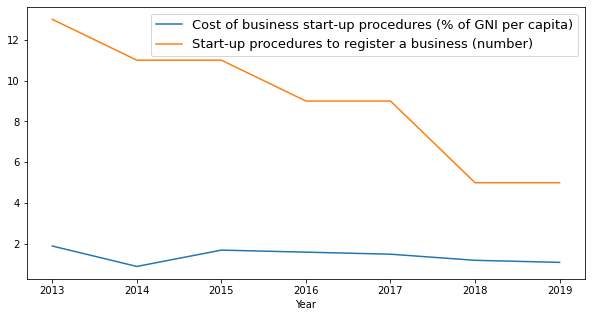

In [44]:
h_neg1 = melt_neg1.pivot(index = 'variable', columns='Series_Name', values='value')
h_neg1.plot(kind='line',figsize=(10,5))
ax = plt.subplot(111)
ax.set_xlabel('Year')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#ax.axvline(x=14, color='grey',ls='--') #2015=20, 2010=15
#ax.axvline(x=19, color='grey',ls='--')
ax.legend(fontsize=13)
plt.savefig('C:/Users/m218101/Desktop/WBS_Coding_school/Course/Final_project/intern_tourism_demographics/pr_s_neg_china_1.png',dpi=200
           ,bbox_inches='tight') 